# Importing Libraries

In [ ]:
from sklearn import preprocessing
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Preprocessing 

In [ ]:
Data=pd.read_csv("toy_dataset.csv")
le_city = preprocessing.LabelEncoder()
le_gender = preprocessing.LabelEncoder()
le_illness = preprocessing.LabelEncoder()
le_city.fit(Data['City'])
le_gender.fit(Data['Gender'])
le_illness.fit(Data['Illness'])
Data['City']=le_city.transform(Data['City'])
Data['Gender']=le_gender.transform(Data['Gender'])
Data['Illness']=le_illness.transform(Data['Illness'])
X_train, X_test = train_test_split(Data, test_size=0.20, random_state=1)
Data=Data.sample(n=300)
Data.head()

,Number,City,Gender,Age,Income,Illness
45721,45722,5,0,63,108133.0,0
104563,104564,4,0,45,132571.0,0
12379,12380,2,1,58,47920.0,0
50470,50471,5,1,65,108712.0,0
117061,117062,1,1,52,75720.0,0


# Elbow Visualization (elbow criterion)

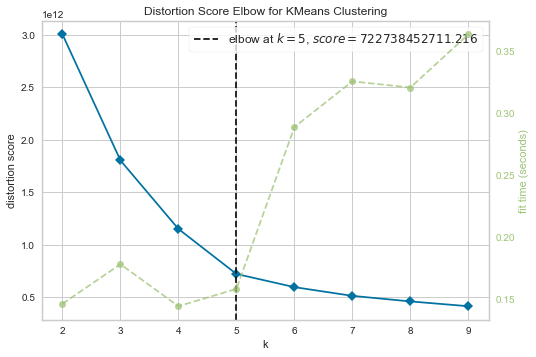

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=0) 
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')
visualizer.fit(Data)    
visualizer.poof()

# Silhouette Score Calculation on first 10 values of K on Training Set

In [ ]:
score=[]
for x in range(2,9):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(X_train)
        temp=silhouette_score(X_train, kmeans.labels_,metric='euclidean')
        score.append(temp)
        print("Score of cluster "+str(x)+"="+str(temp))

Score of cluster 2=0.49183015984980355
Score of cluster 3=0.5023105543057783
Score of cluster 4=0.48785828518482205
Score of cluster 5=0.5335976004645319
Score of cluster 6=0.4849179968280261
Score of cluster 7=0.4564008215030967
Score of cluster 8=0.44586407370608433


# Silhouette Score Calculation on first 10 values of K on Testing Set

In [ ]:
score=[]
for x in range(2,9):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(X_test)
        temp=silhouette_score(X_test, kmeans.labels_,metric='euclidean')
        score.append(temp)
        print("Score of cluster "+str(x)+"="+str(temp))

Score of cluster 2=0.4909682278009037
Score of cluster 3=0.5017001533495836
Score of cluster 4=0.48909080225605445
Score of cluster 5=0.5323599307400898
Score of cluster 6=0.4859552062544447
Score of cluster 7=0.4558763968344202
Score of cluster 8=0.45124752263901297


# 2D Visualization Using PCS on Training Data

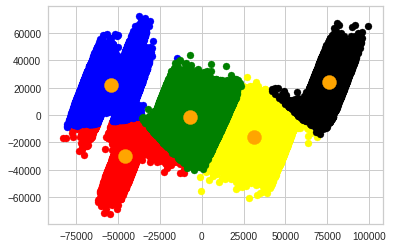

In [ ]:
pca = PCA(2)
df = pca.fit_transform(X_train)
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'yellow')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'black')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'orange')
plt.show()

# 2D Visualization Using PCS on Test Data

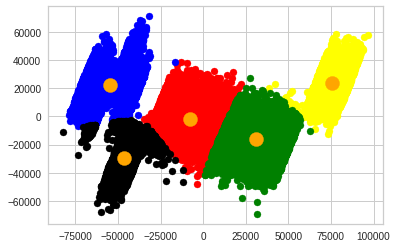

In [ ]:
pca = PCA(2)
df = pca.fit_transform(X_test)
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'yellow')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'black')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'orange')
plt.show()

# Improvements for model accuracy 


1.   Remove the First column Numbers because it wont have any impact on Data
2.   Scale the dataset because all the column values are less than 100 except income



In [ ]:
Data=pd.read_csv("toy_dataset.csv")
del Data["Number"]
le_city = preprocessing.LabelEncoder()
le_gender = preprocessing.LabelEncoder()
le_illness = preprocessing.LabelEncoder()
le_city.fit(Data['City'])
le_gender.fit(Data['Gender'])
le_illness.fit(Data['Illness'])
Data['City']=le_city.transform(Data['City'])
Data['Gender']=le_gender.transform(Data['Gender'])
Data['Illness']=le_illness.transform(Data['Illness'])
Data=Data.sample(n =200)
scaler = StandardScaler()
scaler.fit(Data)
Data=scaler.transform(Data)
Data

array([[ 8.28829301e-01, -1.12815215e+00, -9.06537098e-01,
        -2.62515818e-02,  3.28096112e+00],
       [-7.10791692e-01,  8.86405260e-01, -3.17603485e-01,
        -1.64749122e+00, -3.04788738e-01],
       [-1.97584694e-01, -1.12815215e+00,  2.71330129e-01,
        -4.79243037e-01, -3.04788738e-01],
       [ 8.28829301e-01, -1.12815215e+00,  1.11266386e+00,
        -9.07269629e-01, -3.04788738e-01],
       [ 8.28829301e-01, -1.12815215e+00, -1.57960409e+00,
         3.73812575e-01, -3.04788738e-01],
       [-1.73720569e+00, -1.12815215e+00, -8.22403725e-01,
        -4.85864541e-01, -3.04788738e-01],
       [ 1.34203630e+00,  8.86405260e-01, -6.54136978e-01,
         9.92565348e-01, -3.04788738e-01],
       [ 8.28829301e-01, -1.12815215e+00, -9.90670472e-01,
         2.52701675e-01, -3.04788738e-01],
       [ 8.28829301e-01,  8.86405260e-01, -7.38270352e-01,
        -2.89008996e-01,  3.28096112e+00],
       [ 8.28829301e-01, -1.12815215e+00, -9.06537098e-01,
         5.17069725e-01

# Elbow Visualization

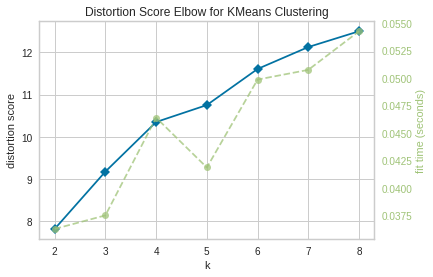

In [ ]:
model = KMeans(random_state=0) 
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion')
visualizer.fit(Data)    
visualizer.poof()

# 2D Plot Using PCA

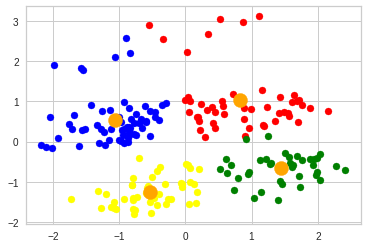

In [ ]:
pca = PCA(2)
df = pca.fit_transform(Data)
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'yellow')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'orange')
plt.show()

In [ ]:
score=[]
for x in range(2,9):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(Data)
        temp=silhouette_score(Data, kmeans.labels_,metric='euclidean')
        score.append(temp)
        print("Score of cluster "+str(x)+"="+str(temp))

Score of cluster 2=0.23545825144061974
Score of cluster 3=0.26027885689499053
Score of cluster 4=0.28736620913661176
Score of cluster 5=0.31666210938614414
Score of cluster 6=0.3115530924795229
Score of cluster 7=0.31361337697740843
Score of cluster 8=0.3256521586549043
